In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
sns.set(style="whitegrid")

data_path = "../data/raw/data.csv" 
df = pd.read_csv(data_path, parse_dates=['TransactionStartTime'], low_memory=False)

print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")
display(df.head())
display(df.info())


Number of rows: 95662, Number of columns: 16


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   TransactionId         95662 non-null  object             
 1   BatchId               95662 non-null  object             
 2   AccountId             95662 non-null  object             
 3   SubscriptionId        95662 non-null  object             
 4   CustomerId            95662 non-null  object             
 5   CurrencyCode          95662 non-null  object             
 6   CountryCode           95662 non-null  int64              
 7   ProviderId            95662 non-null  object             
 8   ProductId             95662 non-null  object             
 9   ProductCategory       95662 non-null  object             
 10  ChannelId             95662 non-null  object             
 11  Amount                95662 non-null  float64            
 12  Valu

None

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

display(df[num_cols].describe().T)

# Skewness and Kurtosis
stats = df[num_cols].agg(['skew', 'kurt']).T
display(stats.sort_values('skew', ascending=False))


,count,mean,std,min,25%,50%,75%,max
CountryCode,95662.0,256.000000,0.000000,256.0,256.0,256.0,256.0,256.0
Amount,95662.0,6717.846433,123306.797164,-1000000.0,-50.0,1000.0,2800.0,9880000.0
Value,95662.0,9900.583941,123122.087776,2.0,275.0,1000.0,5000.0,9880000.0
PricingStrategy,95662.0,2.255974,0.732924,0.0,2.0,2.0,2.0,4.0
FraudResult,95662.0,0.002018,0.044872,0.0,0.0,0.0,0.0,1.0


,skew,kurt
Value,51.291086,3378.069274
Amount,51.098490,3363.127739
FraudResult,22.196295,490.685762
PricingStrategy,1.659057,2.087534
CountryCode,0.000000,0.000000


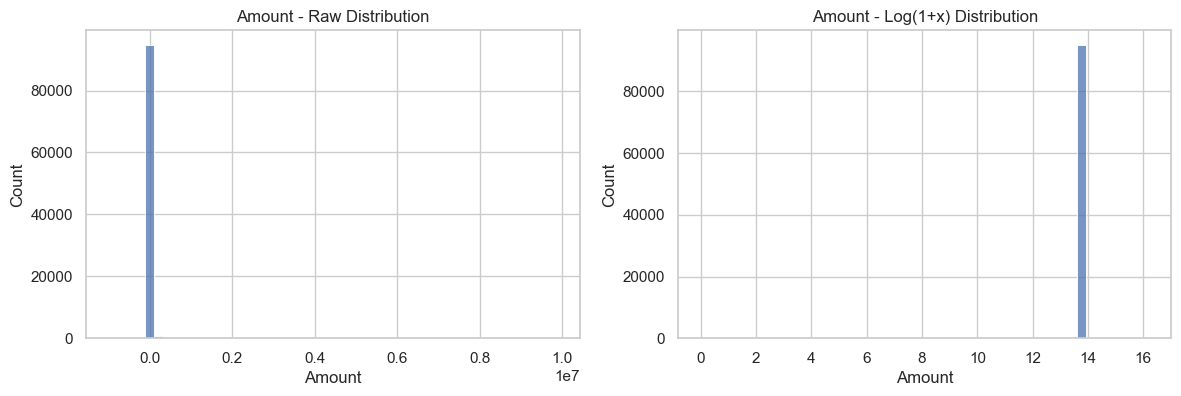

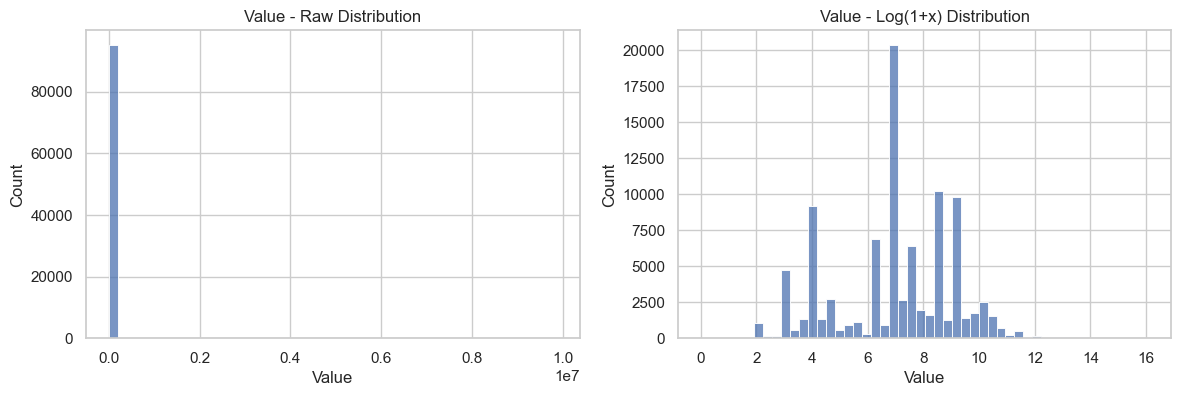

In [3]:
for col in ['Amount', 'Value']:
    if col in df.columns:
        fig, axes = plt.subplots(1,2, figsize=(14,4))
        sns.histplot(df[col].dropna(), bins=50, kde=False, ax=axes[0])
        axes[0].set_title(f'{col} - Raw Distribution')
        
        # Log transform for better visualization
        safe = df[col].copy()
        safe = safe - safe.min() + 1e-6  # avoid negatives
        sns.histplot(np.log1p(safe), bins=50, kde=False, ax=axes[1])
        axes[1].set_title(f'{col} - Log(1+x) Distribution')
        plt.show()


--- ChannelId ---


ChannelId
ChannelId_3    56935
ChannelId_2    37141
ChannelId_5     1048
ChannelId_1      538
Name: count, dtype: int64

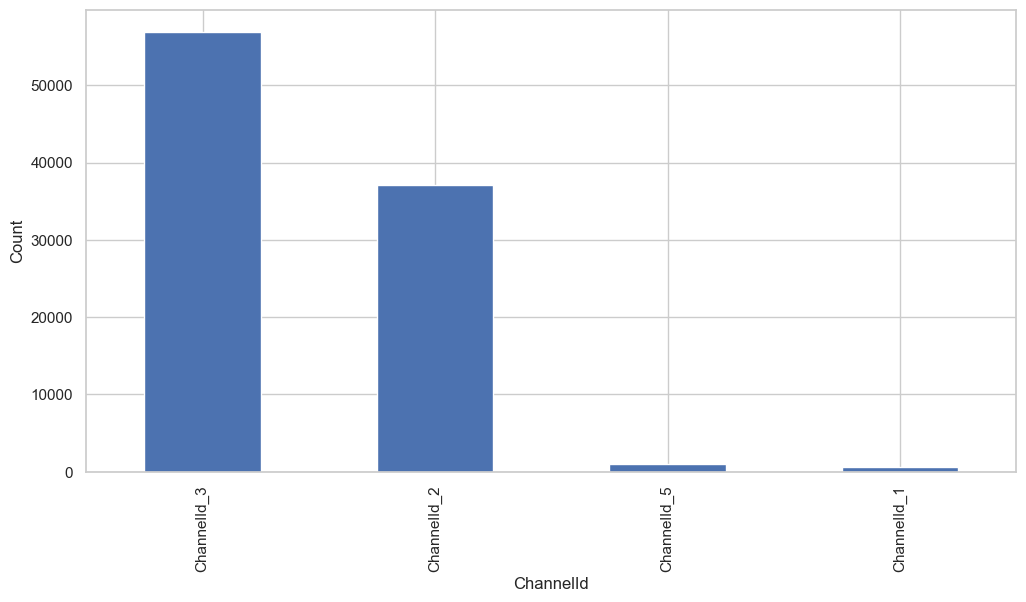

--- ProductCategory ---


ProductCategory
financial_services    45405
airtime               45027
utility_bill           1920
data_bundles           1613
tv                     1279
ticket                  216
movies                  175
transport                25
other                     2
Name: count, dtype: int64

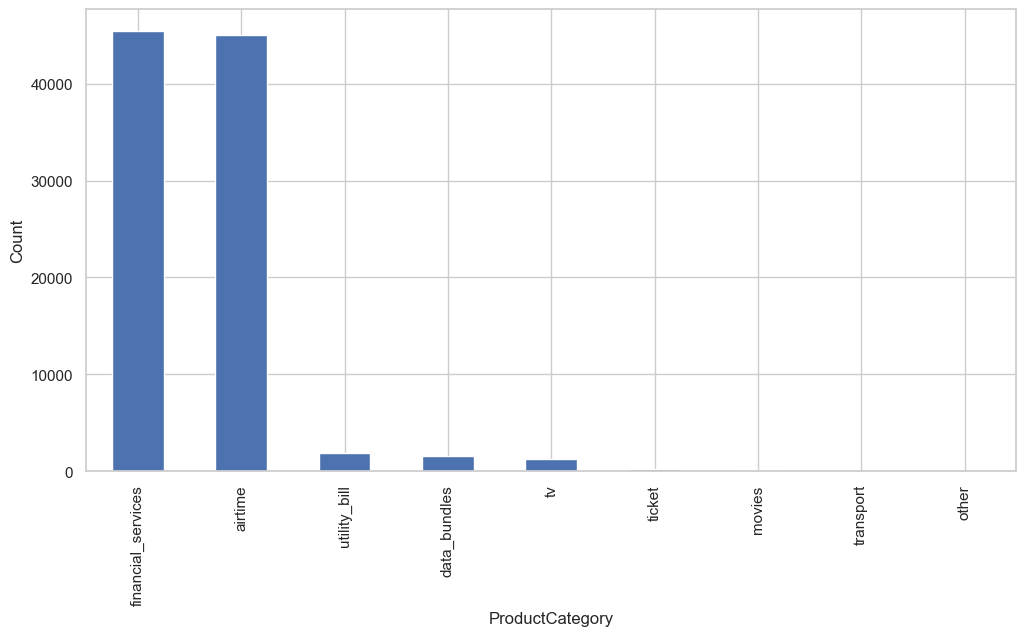

--- CurrencyCode ---


CurrencyCode
UGX    95662
Name: count, dtype: int64

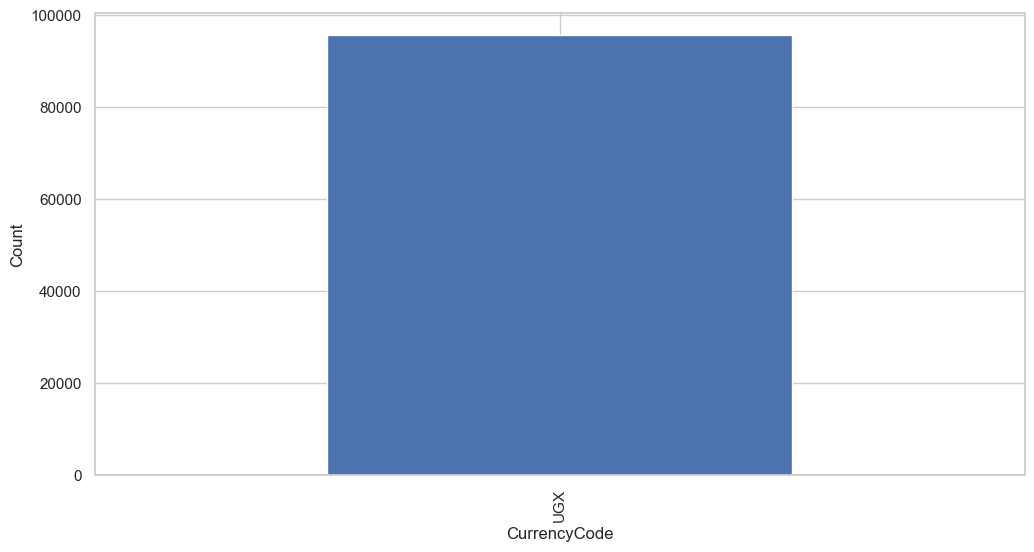

--- CountryCode ---


CountryCode
256    95662
Name: count, dtype: int64

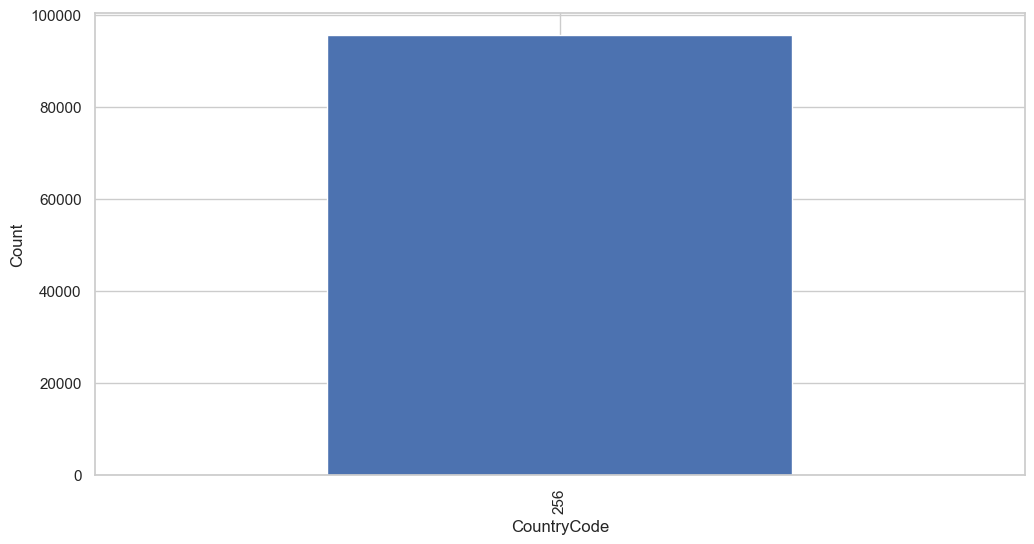

--- ProviderId ---


ProviderId
ProviderId_4    38189
ProviderId_6    34186
ProviderId_5    14542
ProviderId_1     5643
ProviderId_3     3084
ProviderId_2       18
Name: count, dtype: int64

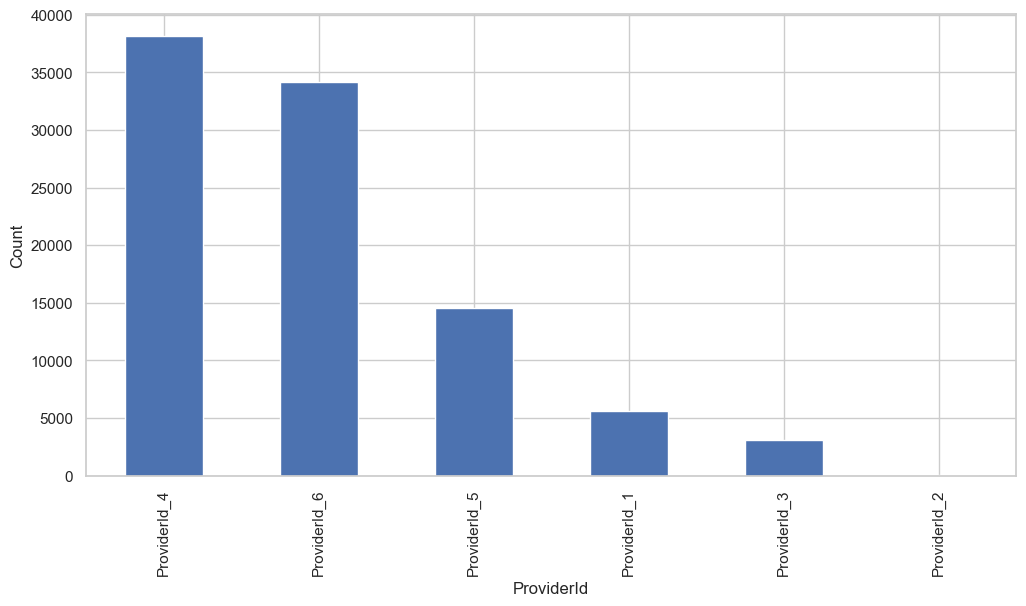

--- PricingStrategy ---


PricingStrategy
2    79848
4    13562
1     1867
0      385
Name: count, dtype: int64

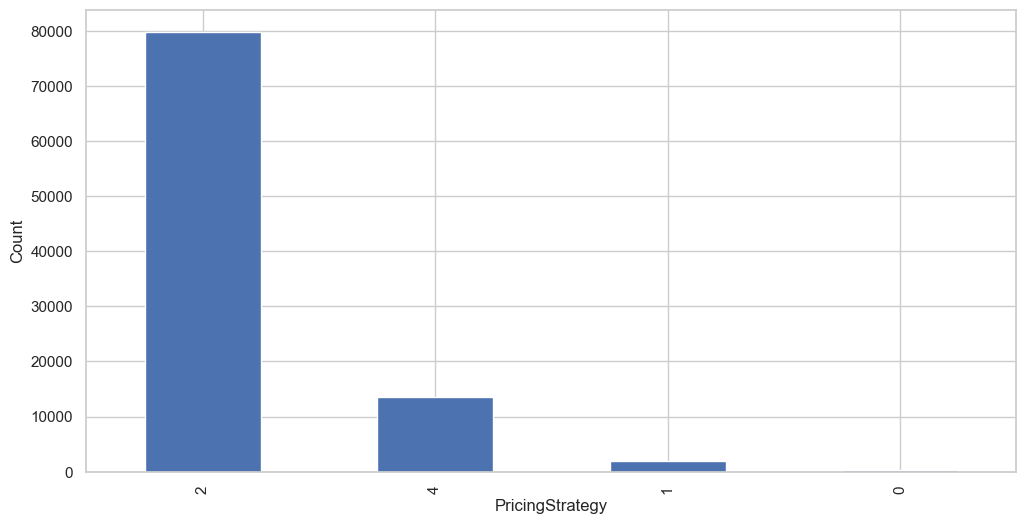

--- FraudResult ---


FraudResult
0    95469
1      193
Name: count, dtype: int64

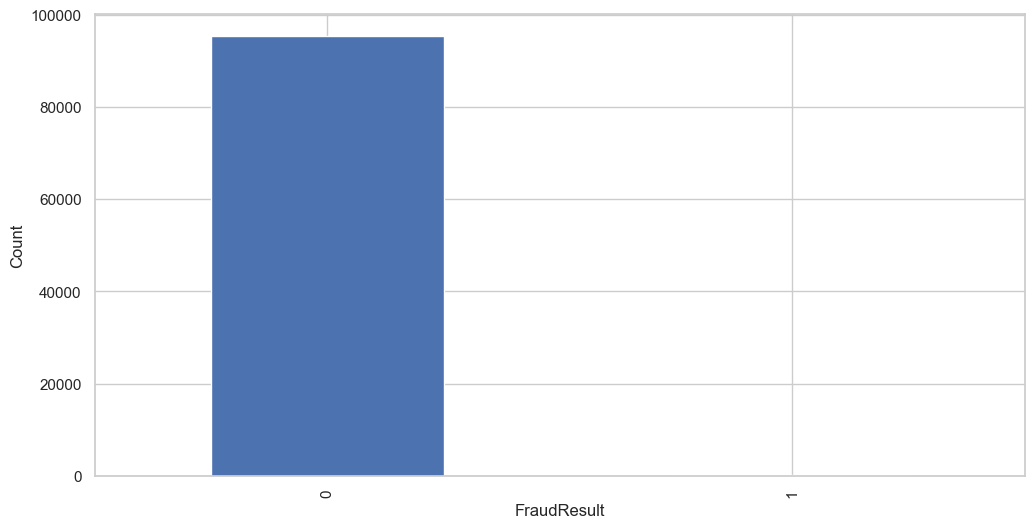

In [4]:
cat_cols = ['ChannelId','ProductCategory','CurrencyCode','CountryCode','ProviderId','PricingStrategy','FraudResult']

for col in cat_cols:
    if col in df.columns:
        vc = df[col].value_counts(dropna=False).head(20)
        print(f"--- {col} ---")
        display(vc)
        vc.plot(kind='bar')
        plt.ylabel('Count')
        plt.show()


In [5]:
missing = df.isna().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_table = pd.concat([missing, missing_pct.rename('pct')], axis=1)
missing_table.columns = ['missing_count', 'missing_pct']
display(missing_table[missing_table['missing_count'] > 0])


,missing_count,missing_pct


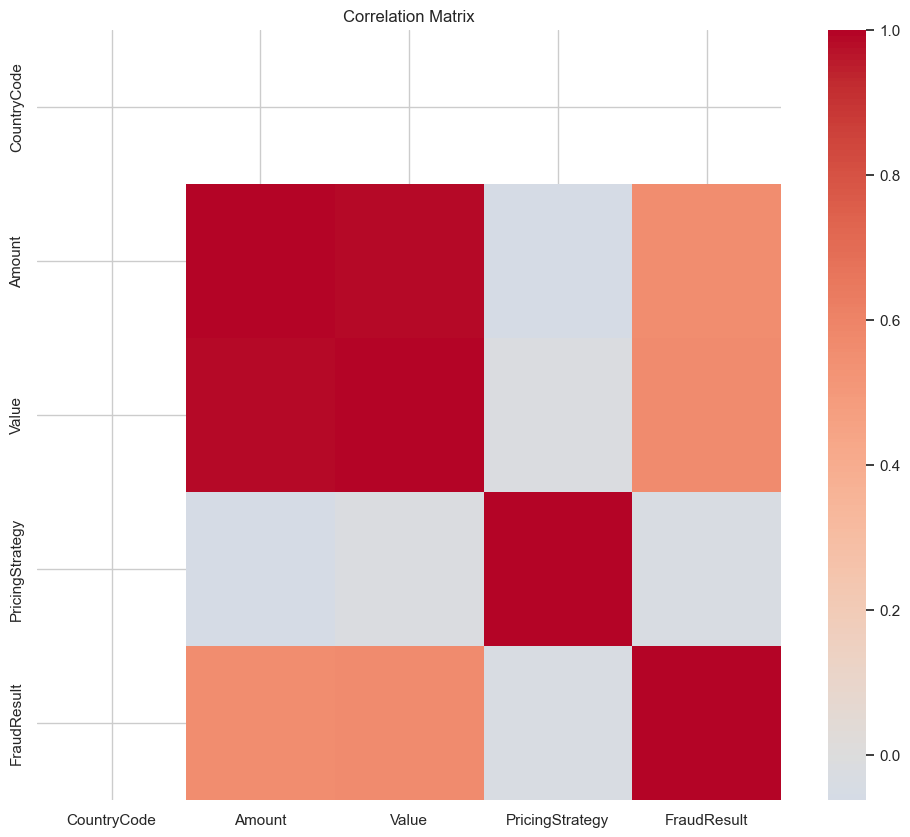

Amount           Amount             1.000000
Value            Amount             0.989692
                 FraudResult        0.566739
Amount           FraudResult        0.557370
PricingStrategy  Amount             0.061931
FraudResult      PricingStrategy    0.033821
Value            PricingStrategy    0.017020
CountryCode      CountryCode             NaN
dtype: float64

In [6]:
numeric = df.select_dtypes(include=['int64','float64'])
corr = numeric.corr()

# Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Top correlations
corr_unstack = corr.abs().unstack().sort_values(ascending=False).drop_duplicates()
display(corr_unstack.head(20))


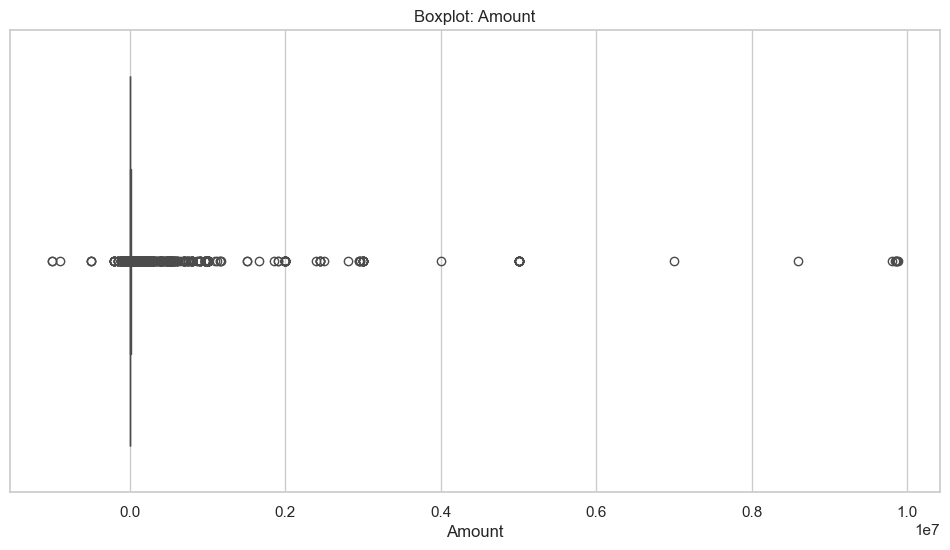

Amount outliers count: 24441


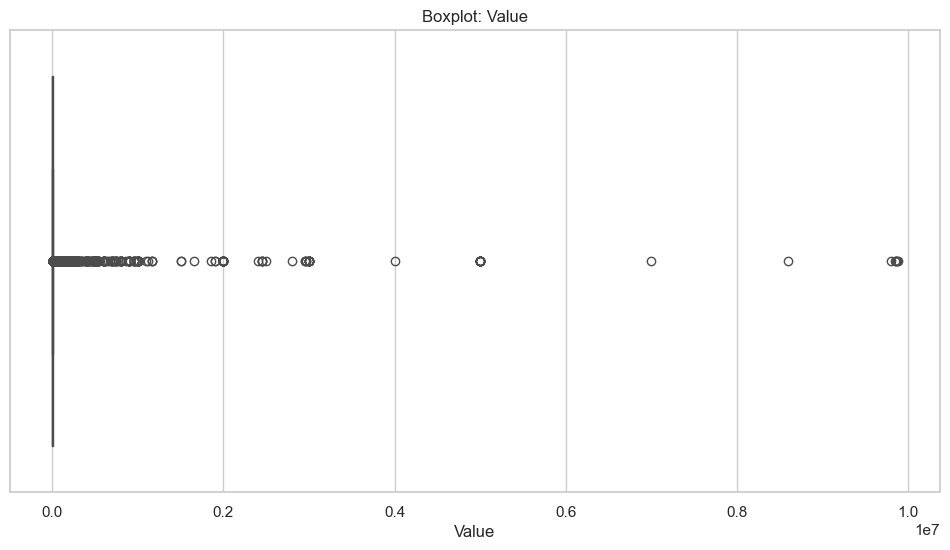

Value outliers count: 9021


In [7]:
for col in ['Amount', 'Value']:
    if col in df.columns:
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot: {col}')
        plt.show()

        # IQR method
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5*iqr
        upper = q3 + 1.5*iqr
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        print(f"{col} outliers count: {outliers.shape[0]}")


In [ ]:
agg_funcs = {
    'Amount': ['sum','mean','std'],
    'Value': ['sum','mean'],
    'TransactionId': 'count',
    'FraudResult': 'max'
}

cust_cols = ['AccountId'] if 'AccountId' in df.columns else ['CustomerId']
cust = df.groupby(cust_cols).agg(agg_funcs)
cust.columns = ['_'.join(col).strip() for col in cust.columns.values]
cust = cust.reset_index()

# Recency (days since last transaction)
cust_last = df.groupby(cust_cols)['TransactionStartTime'].max().reset_index()
cust_last.columns = cust_cols + ['last_txn']
cust = cust.merge(cust_last, on=cust_cols, how='left')
cust['last_txn'] = pd.to_datetime(cust['last_txn'], utc=True)
cust['recency_days'] = (pd.Timestamp.now(tz='UTC') - cust['last_txn']).dt.days


display(cust.head())


,AccountId,Amount_sum,Amount_mean,Amount_std,Value_sum,Value_mean,TransactionId_count,FraudResult_max,last_txn,recency_days
0,AccountId_1,70000.0,2.333333e+04,5773.502692,70000,2.333333e+04,3,0,2019-01-09 19:25:12+00:00,2529
1,AccountId_10,-3330347.0,-3.451137e+03,3567.343270,3404267,3.527738e+03,965,0,2019-02-13 07:19:06+00:00,2494
2,AccountId_100,180000.0,9.000000e+04,14142.135624,180000,9.000000e+04,2,0,2019-01-06 16:40:01+00:00,2532
3,AccountId_1000,97000.0,9.700000e+03,16686.987612,97000,9.700000e+03,10,0,2018-11-25 12:45:04+00:00,2574
4,AccountId_1002,2000000.0,2.000000e+06,NaN,2000000,2.000000e+06,1,0,2019-01-22 12:49:34+00:00,2516


# Task 2 – Exploratory Data Analysis (EDA) Summary

## 1️ Dataset Overview
- The dataset contains **95,662 transactions** with columns such as `TransactionId`, `AccountId`, `CustomerId`, `Amount`, `Value`, `TransactionStartTime`, `ProductCategory`, `ChannelId`, `PricingStrategy`, and `FraudResult`.  

- Transactions include **positive (debit) and negative (credit) amounts**.  

- Timestamps are **timezone-aware**, ensuring consistency for recency calculations.  

- Categorical features like `ProductCategory` and `ChannelId` provide insights into **customer behavior**.

---

## 2️ Summary Statistics
- **Amount**: Mean = 6,718, Std = 123,306, Min = -1,000,000, Max = 9,880,000, **skew = 51.1** → highly skewed distribution.  

- **Value**: Similar distribution to `Amount`, strongly correlated (r ≈ 0.99).  

- **FraudResult**: Rare events (0.2%), heavily imbalanced (**skew = 22.2**).  

- **PricingStrategy**: Limited spread (mostly value 2).  

**Insights:**
- Extreme skew in `Amount` and `Value` → **consider log transformation or robust scaling** for modeling.  

- Low fraud frequency → **class imbalance** handling is required.  

---

## 3️ Categorical Feature Distribution
- **ChannelId counts**:  
  
  - Channel 2 → 79,848 transactions  
  
  - Channel 4 → 13,562  
  
  - Channels 0 and 1 → <2,300 combined  

**Insights:**
- Most transactions occur via **ChannelId 2**, rare channels may indicate **unusual or risky behavior**.  

- Product categories and channels could be predictors for fraud/high-risk customers.

---

## 4️ Correlation Analysis
- **Value and Amount**: r ≈ 0.99 → nearly identical; can drop one.  

- **Value vs FraudResult**: r ≈ 0.57 → higher transaction amounts moderately correlate with fraud.  

- **PricingStrategy vs Amount/FraudResult**: weak correlation.  

**Insights:**
- Features correlated with fraud or extreme values are useful for creating a **proxy variable** for credit risk.  

---

## 5️ Outlier Detection
- Number of outliers in `Value`: **9,021**  

- Extreme min/max values: -1,000,000 / 9,880,000  

**Insights:**
- Outliers represent **high-risk or unusual behavior**, critical for defining a proxy for default.

---

## 6️ Customer-Level Aggregation (RFM Features)
- Aggregated features: `Amount_sum`, `Amount_mean`, `Amount_std`, `TransactionId_count`, `FraudResult_max`, `last_txn`, `recency_days`.  

**Insights:**
- **Recency (`recency_days`)**: long gaps since last transaction may indicate lower risk or inactivity.  

- **High transaction sums and std**: customers with volatile behavior are potentially **high-risk**.  

- **Transaction counts**: frequent activity may indicate normal behavior but requires fraud context.  

- **FraudResult_max = 1**: any previous fraud flags the account as high-risk proxy.  

**Why RFM matters:** These aggregated features summarize **behavioral patterns**, which are essential for building a **credit risk probability model**.

---

##  Top 5 Key Insights
1. **Transaction amounts are highly skewed** → log transform or robust scaling recommended. 

2. **High-value transactions correlate with fraud** → useful for proxy labels.  

3. **Most transactions occur on ChannelId 2** → rare channels may signal unusual behavior.  

4. **Outliers (~9.5%) exist in Value** → may indicate high-risk or fraudulent activity.  

5. **RFM features (`recency_days`, `Amount_std`, `TransactionId_count`)** provide meaningful behavior patterns → strong predictors for credit risk modeling.
